In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from EDMtoolkit import *

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
"""
Vision for this code: easy interface where I can see the timeseries length, species, and visualize the data
all very fast.

GOAL 1:
Print all species names w/ timeseries length and number of missing values

GOAL 2:
Produce plots for timeseries given species name?

"""

'\nVision for this code: easy interface where I can see the timeseries length, species, and visualize the data\nall very fast.\n\nGOAL 1:\nPrint all species names w/ timeseries length and number of missing values\n\nGOAL 2:\nProduce plots for timeseries given species name?\n\n'

In [3]:
fileMeta = "../Datasets/GPDD/data/df35b.234.1-DATA.csv"
fileTaxon = "../Datasets/GPDD/data/df35b.236.1-DATA.csv"
fileData = "../Datasets/GPDD/data/df35b.233.1-DATA.csv"
meta = pd.read_csv(fileMeta,encoding="utf-8",na_filter=False)
taxon = pd.read_csv(fileTaxon,encoding="unicode_escape",na_filter=True)
data = pd.read_csv(fileData,encoding="unicode_escape",na_filter=True)

meta.sort_values("DatasetLength", inplace=True, ascending=False)

pd.option_context("display.max_rows","display.max_columns")

# data.drop(["Level"],1,inplace=True)
# data.set_index(["Site","Month","Year"],inplace=True)
# display(data.query("Site == ['Lake Apopka (FL)'] and "))

"""
for site in data["Site"].drop_duplicates():
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )
"""
# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

'\nfor site in data["Site"].drop_duplicates():\n    for species in data.query("Site == [\'{s}\']".format(s=site))["Name"].drop_duplicates():\n        s = data.query("Site == [\'{s}\'] and Name == [\'{n}\']".format(s=site,n=species))\n        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )\n'

In [22]:
for i in meta["MainID"]:    
    piss = int(meta.query(f"MainID == {i}")["DatasetLength"])
    tid = int(meta.query(f"MainID == {i}")["TaxonID"])
    name = taxon.query(f"TaxonID == {tid}")["CommonName"].iloc[0]
    
    y1 = int(meta.query(f"MainID == {i}")["StartYear"])
    y2 = int(meta.query(f"MainID == {i}")["EndYear"])
    
    print(f"{piss}, {name}, ({y1}-{y2}) [{i}]")
    

1007, Leafhopper, (1974-1994) [8862]
939, Cuban cockroach, (1974-1994) [8720]
920, Unknown, (1974-1994) [8939]
901, Unknown, (1974-1994) [9094]
866, None, (1974-1994) [8887]
840, Unknown, (1974-1994) [8779]
805, Mole crickets or Tree crickets
                             crickets, swierszcze, (1976-1994) [9143]
794, Unknown, (1974-1994) [8792]
759, Bush cricket or Long-horned katydid, (1974-1994) [9112]
747, Praying mantid, (1974-1994) [9114]
734, None, (1978-1994) [8886]
712, None, (1974-1994) [8984]
710, Unknown, (1974-1994) [8662]
693, Unknown, (1974-1994) [8738]
682, None, (1974-1994) [8976]
664, Unknown, (1974-1994) [8747]
650, Unknown, (1974-1994) [8804]
643, Froghopper, (1974-1994) [8780]
633, None, (1974-1994) [8883]
626, Bush cricket or Long-horned katydid, (1977-1994) [9152]
616, Bug, (1974-1994) [9052]
615, Unknown, (1974-1994) [8807]
611, Bush cricket or Long-horned katydid, (1977-1994) [9161]
609, Bush cricket or Long-horned katydid, (1974-1994) [9106]
588, Unknown, (1974-

286, Unknown, (1969-1990) [8398]
286, Rosy apple aphid, (1969-1990) [8272]
286, Strawberry aphid, (1969-1990) [8225]
286, Beech aphid, (1969-1990) [8224]
286, Aphid, (1969-1990) [8223]
286, Lettuce aphid, (1969-1990) [8222]
286, Peach-potato aphid, (1969-1990) [8221]
286, Violet aphid or ornate aphid, (1969-1990) [8220]
286, Shallot aphid, (1969-1990) [8219]
286, Unknown, (1969-1990) [8218]
286, Rose grain aphid, (1969-1990) [8217]
286, Violet aphid or ornate aphid, (1969-1990) [8402]
286, Prune aphid, (1969-1990) [8395]
286, Unknown, (1969-1990) [8216]
286, Potato aphid, (1969-1990) [8215]
286, Currant-Sowthistle aphid, (1969-1990) [8214]
286, Prune aphid, (1969-1990) [8213]
286, Aphid, (1969-1990) [8212]
286, Spruce aphid, (1969-1990) [8211]
286, Sycamore aphid, (1969-1990) [8210]
286, Aphid, (1969-1990) [8209]
286, Willow-carrot aphid, (1969-1990) [8208]
286, Currant-Sowthistle aphid, (1969-1990) [8396]
286, Cabbage aphid, (1969-1990) [8207]
286, Potato aphid, (1969-1990) [8397]
286

260, Willow-carrot aphid, (1971-1990) [8151]
260, Spruce aphid, (1971-1990) [8423]
260, Sycamore aphid, (1969-1988) [8301]
260, Aphid, (1971-1990) [8152]
260, Aphid, (1971-1990) [8424]
260, Sycamore aphid, (1971-1990) [8153]
260, Prune aphid, (1971-1990) [8425]
260, Currant-Sowthistle aphid, (1971-1990) [8426]
260, Sycamore aphid, (1971-1990) [8421]
260, Leaf curling aphid, (1969-1988) [8297]
260, Pea aphid, (1969-1988) [8293]
260, Potato aphid, (1971-1990) [8427]
260, Leaf curling aphid, (1971-1990) [8149]
260, Aphid, (1969-1990) [8382]
260, Violet aphid or ornate aphid, (1969-1988) [8372]
260, Prune aphid, (1971-1990) [8156]
260, Aphid, (1969-1988) [8300]
260, Willow-carrot aphid, (1969-1988) [8359]
260, Rosy apple aphid, (1969-1988) [8362]
260, Aphid, (1971-1990) [8415]
260, Sycamore aphid, (1969-1988) [8361]
260, Bean aphid, (1971-1990) [8414]
260, Pea aphid, (1971-1990) [8413]
260, Aphid, (1969-1988) [8360]
260, Cabbage aphid, (1969-1988) [8358]
260, Rose grain aphid, (1971-1990) 

194, None, (1990-1994) [8723]
190, Unknown, (1977-1993) [8822]
190, Unknown, (1974-1993) [9117]
190, None, (1974-1994) [8912]
189, None, (1974-1994) [8905]
187, None, (1974-1993) [9078]
186, Bush cricket or Long-horned katydid, (1975-1994) [9101]
184, None, (1977-1994) [8893]
182, Unknown, (1974-1994) [9005]
181, None, (1975-1994) [8716]
180, None, (1975-1994) [8855]
178, Bush cricket or Long-horned katydid, (1977-1994) [9154]
177, None, (1974-1993) [9972]
177, Unknown, (1974-1993) [8781]
177, Unknown, (1974-1992) [8946]
177, None, (1979-1994) [8923]
176, Bank vole, (1972-1986) [10105]
175, Unknown, (1974-1994) [8950]
175, Bank vole, (1972-1986) [10104]
174, Unknown, (1974-1993) [9061]
173, Bush cricket or Long-horned katydid, (1974-1988) [9110]
173, Bank vole, (1966-1980) [10167]
170, Unknown, (1977-1994) [8827]
170, Drummer, (1974-1993) [8732]
169, Sycamore aphid, (1971-1990) [8243]
169, Pea aphid, (1971-1990) [8232]
169, Bean aphid, (1971-1990) [8233]
169, Unknown, (1971-1990) [8234

119, Sharpshooter, (1974-1993) [8799]
119, Canadian lynx, (1821-1939) [9376]
119, Unknown, (1974-1993) [9047]
118, Unknown, (1974-1993) [8960]
118, Pink spotted hawk-moth, (1977-1993) [8821]
117, Mute swan, (1823-1939) [20581]
117, Snowshoe hare or American varying hare, (1788-1904) [9713]
115, Unknown, (1977-1994) [8814]
114, Canadian lynx, (1821-1934) [9371]
114, Canadian lynx, (1821-1934) [9373]
114, Common eider, (1955-1965) [6635]
114, Canadian lynx, (1821-1934) [9372]
113, Unknown, (1977-1993) [8754]
113, None, (1979-1993) [8925]
113, Unknown, (1974-1991) [8962]
113, Canadian lynx, (1821-1933) [9375]
113, Canadian lynx, (1821-1933) [20549]
112, Desert locust, (1861-1972) [10001]
111, Atlantic salmon, (1876-1986) [19]
110, Canadian lynx, (1825-1934) [9370]
110, North American deer, (1763-1872) [9734]
109, Bush cricket or Long-horned katydid, (1977-1993) [9122]
109, Bug, (1974-1994) [9066]
109, None, (1974-1993) [8700]
108, Red grouse, (1871-1978) [10127]
106, Unknown, (1974-1993) 

51, North American mink, (1931-1981) [461]
51, American marten, (1931-1981) [427]
51, Bobcat, (1931-1981) [242]
51, North American mink, (1931-1981) [465]
51, Fisher or  Pekan, (1931-1981) [293]
51, North American mink, (1931-1981) [466]
50, Pine hawkmoth, (1881-1930) [9689]
50, Unknown, (1975-1993) [8696]
50, North American mink, (1931-1980) [484]
50, Hawkmoth, (-9999--9999) [9598]
50, Pine hawkmoth, (1881-1930) [20542]
50, Unknown, (1977-1994) [8734]
50, North American mink, (1931-1980) [487]
50, North American mink, (1931-1980) [495]
50, Downy woodpecker, (1927-1976) [1157]
50, Scarlet tiger moth, (1939-1988) [9193]
50, Hairy woodpecker, (1927-1976) [1156]
50, Yellow billed cuckoo, (1927-1976) [1150]
50, Common flicker, (1927-1976) [1153]
50, Indigo bunting, (1927-1976) [1170]
50, Red-bellied woodpecker, (1927-1976) [1154]
50, Scarlet tiger moth, (1939-1988) [9192]
50, Cardinal, (1927-1976) [1169]
50, Sockeye salmon, (1921-1970) [1971]
50, Scarlet tiger moth, (1939-1988) [9191]
50, 

44, Red-backed vole, (1952-1995) [20635]
44, Muskrat, (1916-1959) [10147]
44, Eastern chipmunk, (1952-1995) [20636]
44, Bobcat, (1938-1981) [207]
44, Unknown, (1979-1993) [8755]
44, North American mink, (1914-1957) [9489]
43, Unknown, (1974-1993) [9054]
43, Atlantic herring, (1947-1989) [1769]
43, Dungeness crab, (1950-1992) [2743]
43, None, (1974-1993) [9073]
43, Sockeye salmon, (1943-1985) [2016]
43, None, (1979-1993) [8926]
43, Starling, (1934-1976) [1166]
43, Northern, Pribilof or Alaska fur seal, (1849-1891) [9738]
43, Dungeness crab, (1950-1992) [2742]
43, Virginia opossum, (1849-1891) [9737]
43, Dungeness crab, (1950-1992) [2744]
43, Beaver, (1939-1981) [164]
43, Dungeness crab, (1950-1992) [2745]
43, Dungeness crab, (1950-1992) [2746]
43, Dungeness crab, (1950-1992) [2747]
43, Dungeness crab, (1950-1992) [2748]
43, Dungeness crab, (1950-1992) [2749]
43, Dungeness crab, (1950-1992) [2750]
43, Dungeness crab, (1950-1992) [2751]
43, Heron, (1928-1970) [20531]
43, Dungeness crab, (

34, Muskrat, (1924-1957) [9492]
34, Fox, (1924-1957) [9498]
34, None, (1975-1994) [8656]
34, None, (1974-1992) [8999]
34, Beaver, (1948-1981) [196]
34, Willow warbler, (1927-1960) [2771]
34, Chiffchaff, (1927-1960) [2770]
34, South Pole Skua, (1968-2001) [20582]
34, Rough-legged hawk (buzzard), (1952-1985) [7043]
34, Bobcat, (1935-1968) [231]
34, Unknown, (1977-1993) [8833]
34, Saithe, (1960-1993) [1906]
34, Unknown, (1978-1993) [8761]
34, Sockeye salmon, (1949-1982) [1980]
34, Beaver, (1948-1981) [168]
34, Cod, (1956-1989) [1677]
34, European rabbit, (1944-1977) [7100]
34, Brown hare or European hare, (1944-1977) [7101]
34, Bush cricket or Long-horned katydid, (1982-1994) [9177]
34, Nightingale, (1927-1960) [2772]
33, American red fox, (1949-1981) [374]
33, Beaver, (1949-1981) [160]
33, Saithe, (1960-1992) [1904]
33, American red fox, (1949-1981) [371]
33, Gypsy moth, (-9999--9999) [9646]
33, Beaver, (1949-1981) [180]
33, American red fox, (1949-1981) [392]
33, Beaver, (1949-1981) [17

27, Long-tailed tit, (1949-1975) [1232]
27, Willow tit, (1949-1975) [1231]
27, Beaver, (1955-1981) [173]
27, Pink salmon, (1960-1986) [1865]
27, Pink salmon, (1945-1971) [1826]
27, Marsh tit, (1949-1975) [1230]
27, Nuthatch, (1949-1975) [1233]
27, Carrion crow, (1949-1975) [1224]
27, Sharp-tailed and Pinnated grouse (Greater Prairie Chicken), (1931-1957) [9474]
27, Snowshoe hare or American varying hare, (1931-1957) [1534]
27, Grey partridge, (1932-1958) [9482]
27, Coal tit, (1949-1975) [1229]
27, Ruffed grouse, (1931-1957) [1535]
27, Carabid, (1959-1985) [9188]
27, Carabid, (1959-1985) [9189]
27, Beaver, (1955-1981) [194]
27, Great tit, (1949-1975) [1227]
27, Magpie, (1949-1975) [1225]
27, Treecreeper, (1949-1975) [1234]
27, Eurasian jay, (1949-1975) [1226]
27, Small rivulet, (1967-1993) [1127]
27, Chiffchaff, (1949-1975) [1243]
27, Wren, (1949-1975) [1235]
27, Cod, (1966-1992) [1702]
27, Great crested grebe, (1954-1980) [9270]
27, Mallard, (1954-1980) [9271]
27, Northern pintail, (19

26, Beet carrion beetle, (-9999--9999) [9647]
26, Eurasian perch, (1941-1966) [6097]
26, Eurasian perch, (1941-1966) [6099]
26, Wasp, (-9999--9999) [9638]
26, Blue tit, (1950-1975) [1228]
26, Ruffed grouse, (1927-1952) [1536]
26, Snowshoe hare or American varying hare, (1910-1935) [10125]
26, Hedge sparrow or Dunnock, (1950-1975) [1244]
26, Wasp, (1921-1946) [10138]
26, Codling moth, (-9999--9999) [9657]
26, Cape warthog, Somali warthog or Desert warthog, (1959-1984) [7081]
26, Baboon, (1959-1984) [7080]
26, Bohor reedbuck, (1959-1984) [7079]
26, Harnessed Antelope or Bushbuck, (1959-1984) [7078]
26, Waterbuck, (1959-1984) [7077]
26, Blue Wildebeest, (1959-1984) [7076]
26, Giraffe, (1959-1984) [7075]
26, Black rhinoceros, (1959-1984) [7074]
26, Impala, (1959-1984) [7073]
26, Burchell's zebra, (1959-1984) [7072]
26, Hippopotamus, (1959-1984) [7071]
26, African buffalo, Cape buffalo or Bushcow, (1959-1984) [7070]
26, African elephant, (1959-1984) [7069]
26, Flea beetle, (-9999--9999) [96

24, Mourning dove, (1953-1976) [1149]
24, Black redstart, (1940-1963) [2758]
24, Coyote or  Prarie wolf, (1958-1981) [264]
24, Coyote or  Prarie wolf, (1958-1981) [272]
24, Pink salmon, (1960-1983) [1831]
24, Red-headed woodpecker, (1953-1976) [1177]
24, Beaver, (1958-1981) [159]
24, Arctic fox, (1919-1942) [307]
24, North American mink, (1956-1979) [454]
24, Atlantic herring, (1967-1990) [1743]
24, Atlantic herring, (1947-1970) [1765]
24, Field sparrow, (1946-1969) [1207]
24, Canadian lynx, (1955-1978) [419]
24, Pink salmon, (1960-1983) [1830]
24, Mountain hare or Varying hare, (1916-1939) [1342]
23, Reindeer or Caribou, (1968-1990) [10051]
23, Sockeye salmon, (1961-1983) [1966]
23, Blue tit, (1961-1983) [6531]
23, Cod, (1970-1992) [1689]
23, Silver, (1967-1989) [10142]
23, Unknown, (1975-1993) [9092]
23, Reindeer or Caribou, (1968-1990) [10050]
23, Cod, (1970-1992) [1690]
23, Bobcat, (1933-1955) [210]
23, Silver, (1967-1989) [10096]
23, Plaice, (1968-1990) [1900]
23, Silver, (1967-19

20, Muskrat, (1919-1938) [9219]
20, Whitethroat, (1976-1995) [1470]
20, Whitethroat, (1976-1995) [1500]
20, Spotted flycatcher, (1976-1995) [1492]
20, Starling, (1976-1995) [1493]
20, Water vole, (1941-1960) [10009]
20, Yellowhammer, (1976-1995) [1494]
20, Eurasian collared-dove, (1976-1995) [1495]
20, Magpie, (1976-1995) [1496]
20, Blue tit, (1976-1995) [1497]
20, Wren, (1976-1995) [1498]
20, Blackcap, (1976-1995) [1499]
20, Willow warbler, (1976-1995) [1501]
20, Whitethroat, (1976-1995) [1490]
20, Spotted flycatcher, (1976-1995) [1502]
20, Yellowhammer, (1976-1995) [1503]
20, Wheat blossom midge, (1927-1946) [1523]
20, Wheat blossom midge, (1927-1946) [1524]
20, Snowshoe hare or American varying hare, (1932-1951) [9486]
20, Atlantic herring, (1970-1989) [1760]
20, Ruffed grouse, (1939-1958) [9466]
20, Chub mackerel, (1951-1970) [1674]
20, Cod, (1974-1993) [1682]
20, Willow warbler, (1976-1995) [1491]
20, Blackcap, (1976-1995) [1489]
20, Willow warbler, (1976-1995) [1471]
20, Larch bu

19, Grey-sided vole, red-grey vole, (1974-1992) [10057]
19, Collared flycatcher, (1965-1983) [9449]
19, Blue tit, (1965-1983) [9448]
19, Great tit, (1965-1983) [9447]
18, Canadian pondweed or waterweed, (1958-1975) [5027]
18, Garden warbler, (1960-1977) [9875]
18, Water stargrass, (1958-1975) [5028]
18, None, (1983-1993) [9032]
18, Naiads, (1958-1975) [5026]
18, Field vole, (1971-1988) [6719]
18, Bank vole, (1971-1988) [6715]
18, Whitethroat, (1960-1977) [9874]
18, Lesser whitethroat, (1960-1977) [9873]
18, American eelgrass, (1958-1975) [5025]
18, Spiked water-milfoil, (1958-1975) [5024]
18, Grey-sided vole, red-grey vole, (1971-1988) [6717]
18, American Alligator, (1972-1989) [20624]
18, Unknown, (1974-1993) [8703]
18, Unknown, (1978-1990) [9053]
18, European red squirrel, (1885-1902) [1371]
18, Wood warbler, (1960-1977) [9877]
18, Montane vole, (1970-1987) [1402]
18, Chiffchaff, (1960-1977) [9878]
18, Willow warbler, (1960-1977) [9879]
18, Spotted flycatcher, (1960-1977) [9880]
18, 

17, Barred chestnut, (1968-1984) [6218]
17, Ingrailed clay, (1968-1984) [6217]
17, Large ranunculus, (1968-1984) [6327]
17, Dark sword grass, (1968-1984) [6216]
17, Merville du jour, (1968-1984) [6326]
17, Red-line quaker, (1968-1984) [6325]
17, Brindled green, (1968-1984) [6324]
17, Black rustic, (1968-1984) [6322]
17, Oak eggar, (1968-1984) [6176]
17, Red sword-grass, (1968-1984) [6321]
17, Popular grey, (1968-1984) [6320]
17, Deep-brown dart, (1968-1984) [6319]
17, Blood-vein, (1968-1984) [6378]
17, Grey shoulder-knot, (1968-1984) [6318]
17, Uncertain moth, (1968-1984) [6278]
17, Muslin footman, (1968-1984) [6181]
17, Marbled beauty, (1968-1984) [6317]
17, Minor shoulder-knot, (1968-1984) [6316]
17, Dark arches, (1968-1984) [6279]
17, Dark brocade, (1968-1984) [6329]
17, Grey chi, (1968-1984) [6330]
17, Brick, (1968-1984) [6331]
17, Fox moth, (1968-1984) [6179]
17, Plain clay, (1968-1984) [6225]
17, Pebble hook-tip, (1968-1984) [6177]
17, Dusky-lemon sallow, (1968-1984) [6342]
17, F

17, Purple thorn, (1968-1984) [6481]
17, Canary-shouldered thorn, (1968-1984) [6480]
17, Dotted border, (1968-1984) [6479]
17, Lunar thorn, (1968-1984) [6478]
17, Muslin, (1968-1984) [6198]
17, Scalloped oak, (1968-1984) [6491]
17, White abalone, (1965-1981) [7031]
17, Ruby tiger, (1968-1984) [6190]
17, Vine's rustic, (1968-1984) [6284]
17, Small brindled beauty, (1968-1984) [6495]
17, Pied flycatcher, (1948-1964) [7039]
17, Scorched Wing, (1968-1984) [6494]
17, Waved umber, (1968-1984) [6493]
17, Archer's dart, (1968-1984) [6204]
17, Pale brindled beauty, (1968-1984) [6492]
17, Cinnabar, (1968-1984) [6189]
17, Privet hawkmoth, (1968-1984) [6146]
17, Buff footman, (1968-1984) [6191]
17, Slender brindle, (1968-1984) [6280]
17, Common swift, (1968-1984) [6203]
17, Map-winged swift, (1968-1984) [6202]
17, Common rustic, (1968-1984) [6283]
17, Clouded buff, (1968-1984) [6201]
17, White ermine, (1968-1984) [6192]
17, Scarce footman, (1968-1984) [6200]
17, Clouded-bordered brindle, (1968-198

16, None, (1974-1991) [8876]
16, Western capercaillie or Wood grouse, (1964-1979) [9208]
16, Western capercaillie or Wood grouse, (1964-1979) [9209]
16, Hairy woodpecker, (1969-1984) [6745]
16, Downy woodpecker, (1969-1984) [6744]
16, Wren, (1969-1984) [6743]
16, Blue tit, (1970-1985) [9325]
16, American redstart, (1969-1984) [6728]
16, Ovenbird, (1969-1984) [6742]
16, Southern chorus frog, (1979-1994) [20619]
15, Black abalone, (1967-1981) [7032]
15, Douglas fir tussock moth, (-9999--9999) [20632]
15, Northern razor clam, (1960-1974) [7034]
15, Cod, (1978-1992) [1688]
15, Whiting, (1976-1990) [2071]
15, San Joaquin kit fox, (1981-1995) [20646]
15, Spanish sardine, (1976-1990) [1944]
15, Seepage salamander, (1976-1994) [20609]
15, Bald eagle, (1972-1986) [5036]
15, Sockeye salmon, (1978-1992) [1984]
15, Yellow necked mouse, (1959-1973) [9356]
15, Field vole, (1959-1973) [9357]
15, Eurasian oystercatcher, (1963-1977) [7040]
15, Shrew, (1959-1973) [9359]
15, Mountain dusky salamander, (1

13, European rabbit, (1947-1959) [9940]
13, Stoat, (1947-1959) [9939]
13, Least weasel, (1947-1959) [9937]
13, West European hedgehog, (1947-1959) [9935]
13, Reed bunting, (1983-1995) [1285]
13, Hairy hawkbit or Lesser hawkbit, (1985-1997) [6609]
13, Great cormorant, (1980-1992) [9336]
13, Sea-holly, (1985-1997) [6607]
13, Common eel, (1975-1987) [6577]
13, Sole or Dover sole, (1979-1991) [2041]
13, Pre David's deer, (1985-1997) [20648]
13, Bug, (1975-1993) [9050]
13, Great cormorant, (1980-1992) [23]
13, Sockeye salmon, (1973-1985) [2030]
13, Sockeye salmon, (1979-1991) [2029]
13, Common eider, (1980-1992) [30]
13, Redback salamander, (1967-1979) [20604]
13, Sockeye salmon, (1935-1947) [1979]
13, Willow warbler, (1983-1995) [1289]
13, Great cormorant, (1980-1992) [49]
13, North American badger or American badger, (1969-1981) [85]
13, Coyote or  Prarie wolf, (1969-1981) [266]
13, Red deer or Red elk, (1971-1983) [6585]
13, Unknown, (1985-1997) [6606]
13, Unknown, (1985-1997) [6593]
13

12, Trowbridges shrew, (1954-1965) [6706]
12, Black rustic, (-9999--9999) [9596]
12, Leafhopper, (-9999--9999) [9595]
12, Leafhopper, (-9999--9999) [9594]
12, Bush cricket or Long-horned katydid, (-9999--9999) [9593]
12, Unknown, (-9999--9999) [9562]
12, Wren, (1964-1975) [9528]
12, Oregon vole, (1954-1965) [6701]
12, Oregon vole, (1954-1965) [6698]
12, Unknown, (-9999--9999) [9567]
12, Totrix moth, (-9999--9999) [9566]
12, Sawfly, (-9999--9999) [9565]
12, Unknown, (-9999--9999) [9559]
12, Swallowtail, (-9999--9999) [9614]
12, Grey fox, (1970-1981) [324]
12, Swallowtail, (-9999--9999) [9615]
12, Grey fox, (1970-1981) [325]
12, Grey fox, (1970-1981) [326]
12, Scarce tissue, (1984-1995) [9766]
12, Grey fox, (1970-1981) [328]
12, Grey fox, (1970-1981) [329]
12, Grey fox, (1970-1981) [330]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9625]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9624]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9623]
12, Red-

11, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9626]
11, Red crossbill, (1927-1937) [9256]
11, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9627]
11, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9633]
11, Red-backed vole, (1966-1976) [9387]
11, Woodland jumping mouse, (1966-1976) [9388]
11, Long-tailed tit, (1952-1962) [6643]
11, Eastern chipmunk, (1966-1976) [9389]
11, Common toad, (1980-1990) [20599]
11, Northern short-tailed shrew, (1966-1976) [9390]
11, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9632]
11, None, (1975-1991) [8658]
11, Eurasian lynx, (1956-1966) [9401]
11, Braconid wasp, (-9999--9999) [9530]
11, Sharp-tailed grouse, (1948-1958) [9478]
11, Snowshoe hare or American varying hare, (1932-1942) [9461]
11, None, (1982-1991) [8970]
10, Ringlet, (1976-1985) [3529]
10, Small heath, (1976-1985) [3528]
10, Painted lady, (1976-1985) [6662]
10, Small skipper, (1976-1985) [3530]
10, Meadow brown, (1976-1985) [3570]
10, Small skipper, (19

10, Variable checkerspot butterfly, (1968-1977) [7118]
10, Great cormorant, (1985-1994) [43]
10, Brimstone, (1976-1985) [3864]
10, Large skipper, (1976-1985) [3861]
10, Small skipper, (1976-1985) [3860]
10, Dingy skipper, (1976-1985) [3822]
10, Brimstone, (1976-1985) [3825]
10, Large white, (1976-1985) [3827]
10, Small white, (1976-1985) [3829]
10, Green-veined white, (1976-1985) [3831]
10, Green-veined white, (1976-1985) [3832]
10, Orange tip, (1976-1985) [3833]
10, Green hairstreak, (1976-1985) [3834]
10, Small copper, (1976-1985) [3837]
10, Brown argus, (1976-1985) [3838]
10, Common blue, (1976-1985) [3840]
10, Holly blue, (1976-1985) [3843]
10, Duke of burgundy, (1976-1985) [3845]
10, Red admiral, (1976-1985) [3846]
10, Painted lady, (1976-1985) [3847]
10, Small tortoiseshell, (1976-1985) [3848]
10, Peacock, (1976-1985) [3849]
10, Comma, (1976-1985) [3851]
10, Speckled wood, (1976-1985) [3852]
10, Wall, (1976-1985) [3853]
10, Marbled white, (1976-1985) [3855]
10, Hedge brown, (1976

10, Ringlet, (1976-1985) [3105]
10, Small skipper, (1976-1985) [3106]
10, Brimstone, (1976-1985) [3108]
10, Large white, (1976-1985) [3110]
10, Meadow brown, (1976-1985) [3063]
10, Grayling, (1976-1985) [3061]
10, Small tortoiseshell, (1976-1985) [3016]
10, Green-veined white, (1976-1985) [3033]
10, Peacock, (1976-1985) [3017]
10, Comma, (1976-1985) [3019]
10, Speckled wood, (1976-1985) [3020]
10, Wall, (1976-1985) [3021]
10, Hedge brown, (1976-1985) [3023]
10, Meadow brown, (1976-1985) [3024]
10, Small heath, (1976-1985) [3025]
10, Ringlet, (1976-1985) [3026]
10, Small skipper, (1976-1985) [3027]
10, Brimstone, (1976-1985) [3028]
10, Large white, (1976-1985) [3030]
10, Small white, (1976-1985) [3032]
10, Green-veined white, (1976-1985) [3034]
10, Wall, (1976-1985) [3059]
10, Orange tip, (1976-1985) [3035]
10, Common blue, (1976-1985) [3037]
10, Painted lady, (1976-1985) [3040]
10, Peacock, (1976-1985) [3041]
10, Large white, (1976-1985) [3043]
10, Small white, (1976-1985) [3045]
10, C

10, Large white, (1976-1985) [3393]
10, Small white, (1976-1985) [3360]
10, Green-veined white, (1976-1985) [3362]
10, Small skipper, (1976-1985) [3388]
10, Small heath, (1976-1985) [3386]
10, Wall, (1976-1985) [3382]
10, Green-veined white, (1976-1985) [3363]
10, Orange tip, (1976-1985) [3364]
10, Purple hairstreak, (1976-1985) [3365]
10, Black hairstreak, (1976-1985) [3366]
10, Common blue, (1976-1985) [3371]
10, Holly blue, (1976-1985) [3372]
10, White admiral, (1976-1985) [3374]
10, Red admiral, (1976-1985) [3375]
10, Small tortoiseshell, (1976-1985) [3377]
10, Peacock, (1976-1985) [3378]
10, Codling moth, (1967-1976) [9683]
10, Dark green fritillary, (1976-1985) [3343]
10, Small tortoiseshell, (1976-1985) [3342]
10, Common blue, (1976-1985) [3340]
10, The streamer, (-9999--9999) [9645]
10, Purple hairstreak, (1976-1985) [3401]
10, Green hairstreak, (1976-1985) [3400]
10, Orange tip, (1976-1985) [3399]
10, Red admiral, (1976-1985) [3309]
10, Painted lady, (1976-1985) [3310]
10, Sma

8, Pink salmon, (1980-1987) [1862]
8, None, (1975-1990) [8672]
8, Megrim, (1984-1991) [1801]
8, Scad, (1985-1992) [1799]
8, Sardine, (1983-1990) [1937]
8, Anadromous alewife, (1977-1984) [1600]
7, Sockeye salmon, (1954-1960) [2000]
7, Steelhead trout, (1976-1982) [2046]
7, Steelhead trout, (1976-1982) [2045]
7, Sole or Dover sole, (1984-1990) [2036]
7, Pink salmon, (1970-1982) [1843]
7, Steelhead trout, (1977-1983) [2044]
7, Haddock, (1985-1991) [1731]
7, Freshwater brook trout, (1984-1990) [1651]
7, Freshwater brook trout, (1984-1990) [1649]
7, Freshwater brook trout, (1984-1990) [1647]
7, Freshwater brook trout, (1984-1990) [1643]
7, Atlantic salmon, (1954-1960) [1617]
7, Freshwater brook trout, (1984-1990) [1641]
7, Freshwater brook trout, (1984-1990) [1638]
6, Atlantic salmon, (1967-1972) [1629]
6, Grey fox, (1976-1981) [339]
6, Megrim, (1986-1991) [1802]
6, Monkfish, (1986-1991) [1805]
6, Freshwater brook trout, (1984-1989) [1646]
4, Anchovy, (1987-1990) [1607]


In [23]:
def getTimeSeries(t):
    return data.query(f"MainID == {t}")["Population"].to_numpy()


<IPython.core.display.Javascript object>


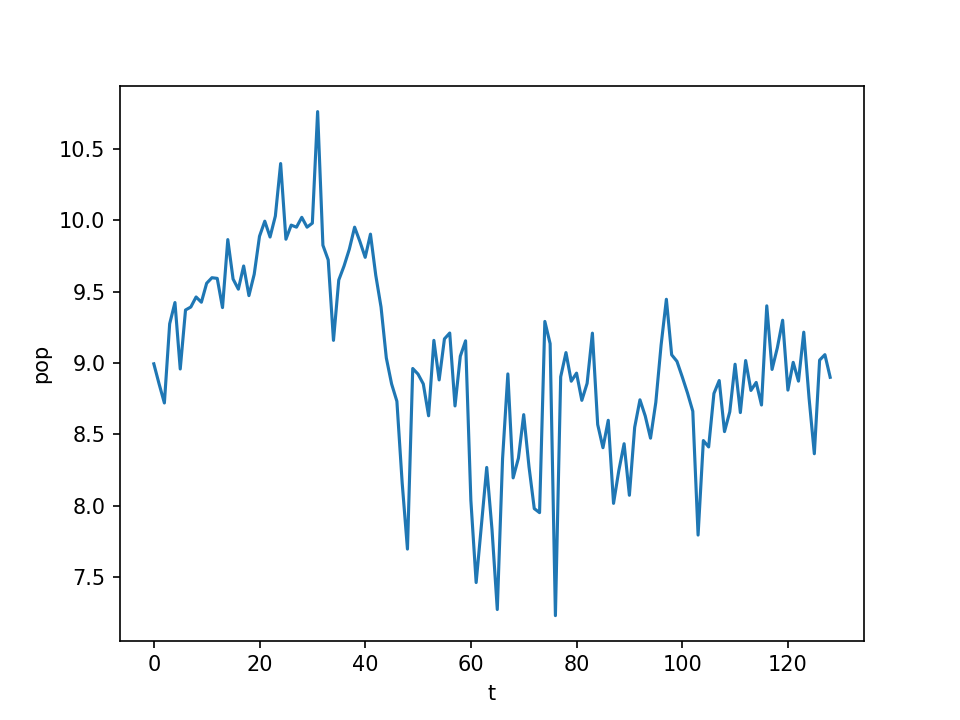

<IPython.core.display.Javascript object>


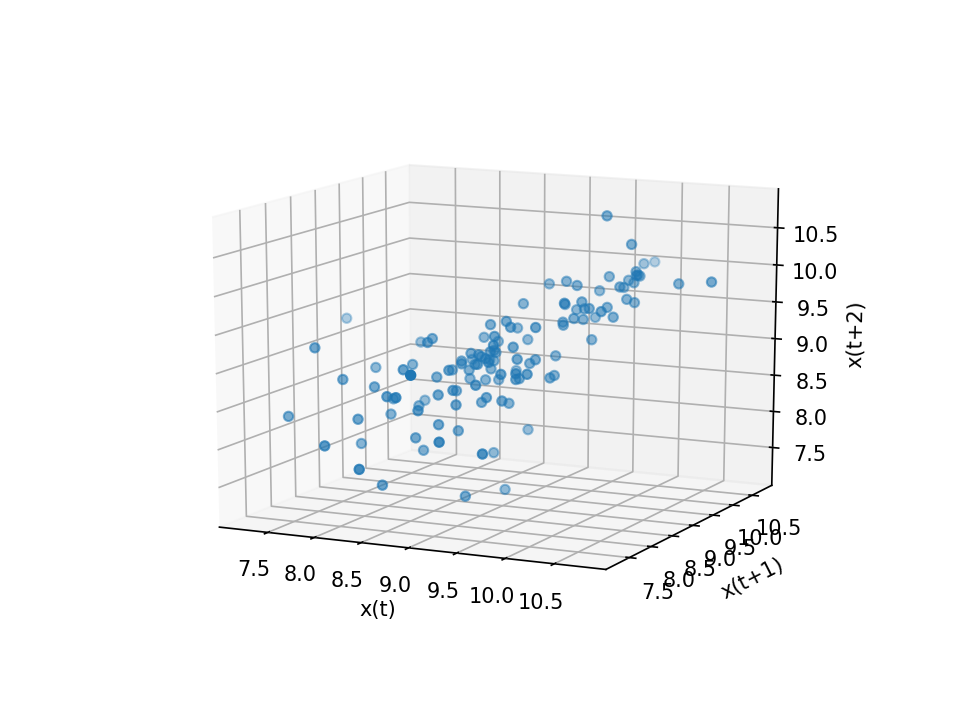

<IPython.core.display.Javascript object>


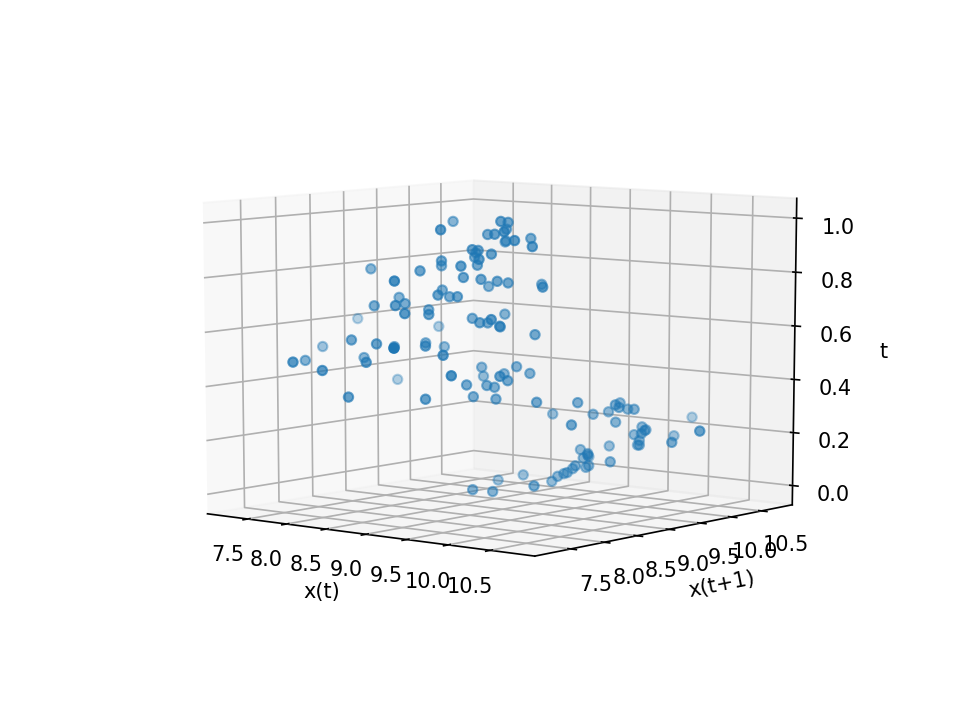

<IPython.core.display.Javascript object>


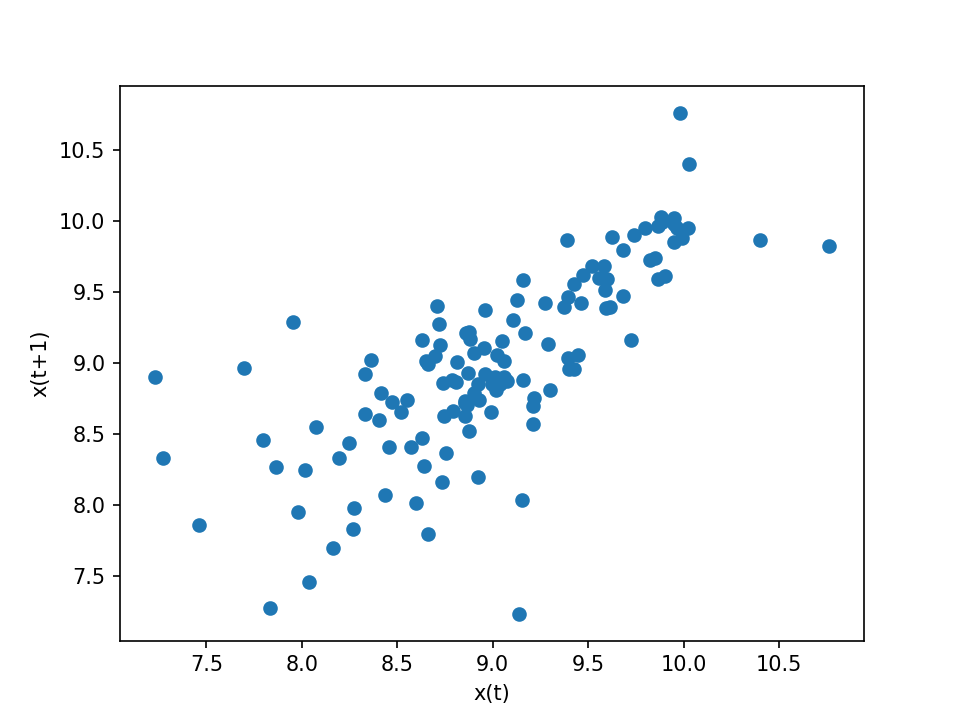

In [41]:
s = getTimeSeries(9723)
s = np.log(s+1)
s = s.reshape((s.shape[0],1))

plotTS(s)
poincare3d(s)
poincareT(s)
poincare2d(s)

<IPython.core.display.Javascript object>


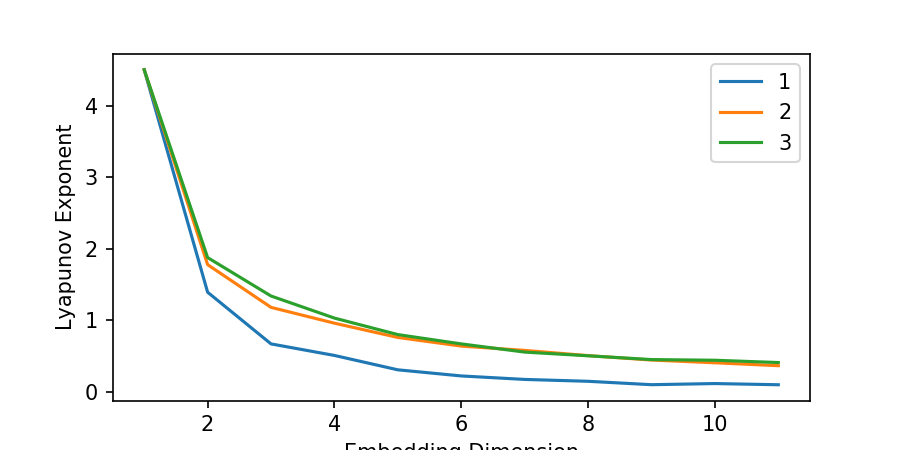

In [34]:
FNNplot(s)

In [8]:
# s = np.array([1,2,3,4,5,6,7,8,9,10,0])

In [35]:
X, Y, tx, ty = delayEmbed(s, 3, 1, 1, t = np.linspace(0,1,num=s.shape[0]))

<IPython.core.display.Javascript object>


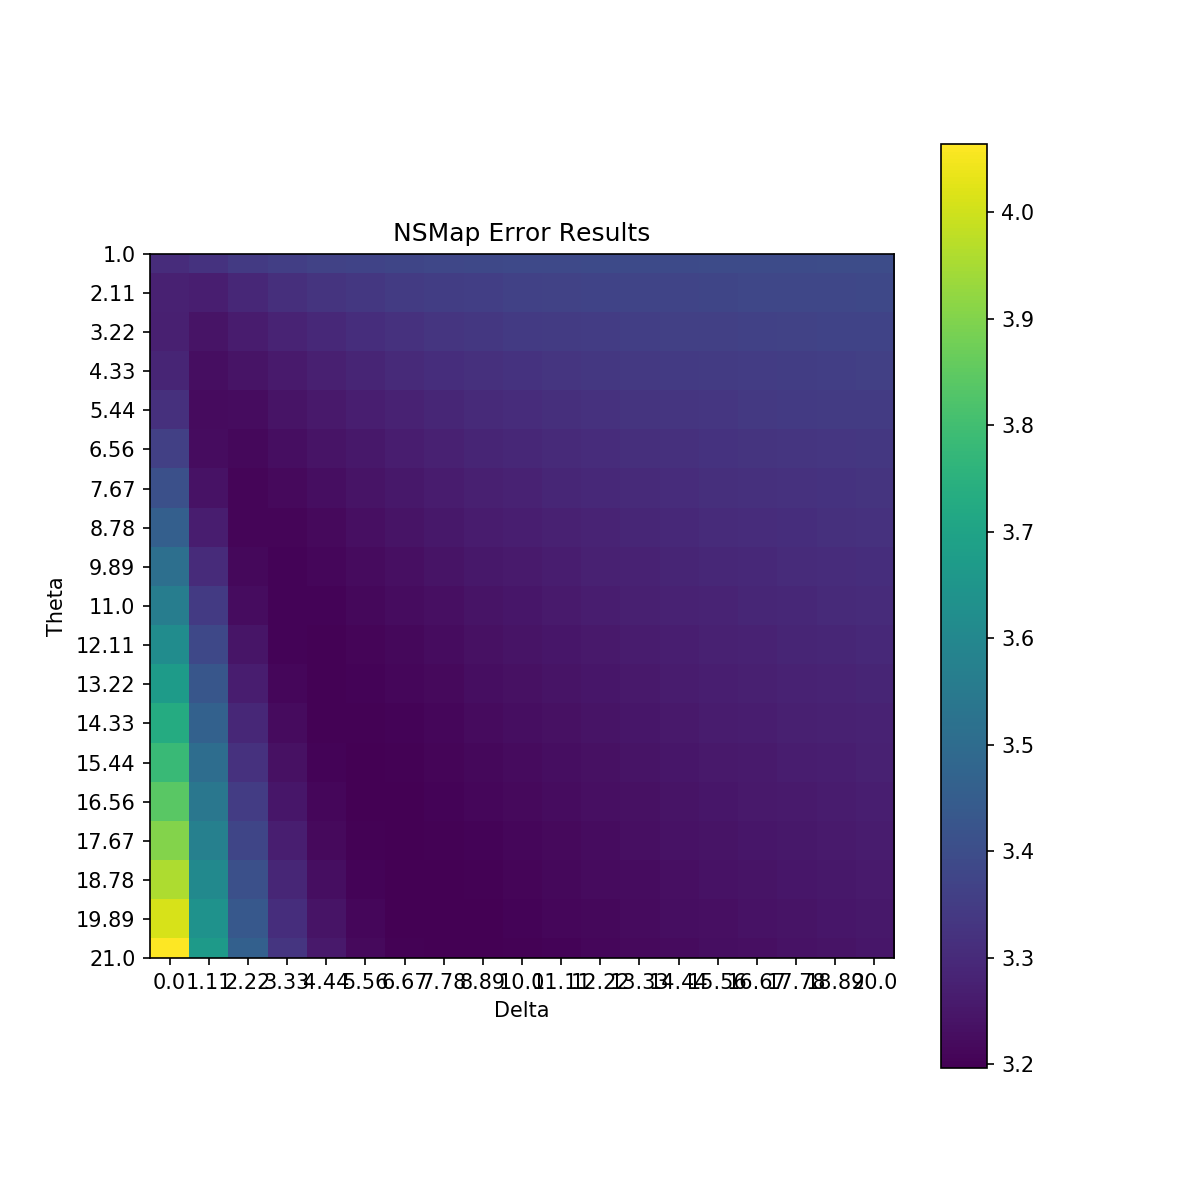

Min SMap Error: 26.407130560904307, Min NSMap Error: 24.447649894375097
Improvement of NSMap: 1.0801500624802405


In [72]:
d = 19
thetas = np.linspace(1,21,num=d)
deltas = np.linspace(0,20,num=d)

thetaB, deltaB, errMap = GMapOptimize(X, Y, tx,thetas, deltas)

thetaBS = thetas[np.argmin(errMap[:,0])]

<IPython.core.display.Javascript object>


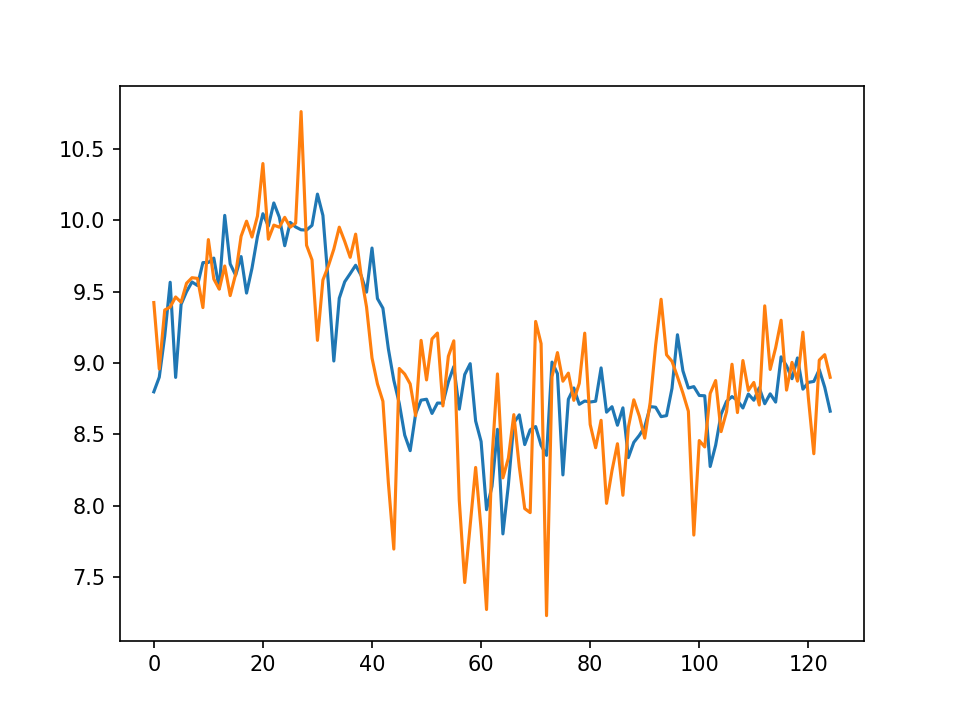

In [83]:
pred = leaveOneOut(X, Y, tx, thetaB, deltaB)

fig, ax = plt.subplots(1)
ax.plot(pred)

ax.plot(Y)

In [82]:

print(Y.shape, pred.shape)
scipy.stats.pearsonr(Y.flatten(), pred)


(125, 1) (125, 1)


(array([0.7393349945257591], dtype=object), 7.195883746719077e-23)

In [65]:
print(f"NSMap: theta={thetaB}, delta={deltaB}")
print(f"SMap: theta={thetaBS}")

NSMap: theta=21.0, delta=8.421052631578947
SMap: theta=3.1052631578947367


<IPython.core.display.Javascript object>


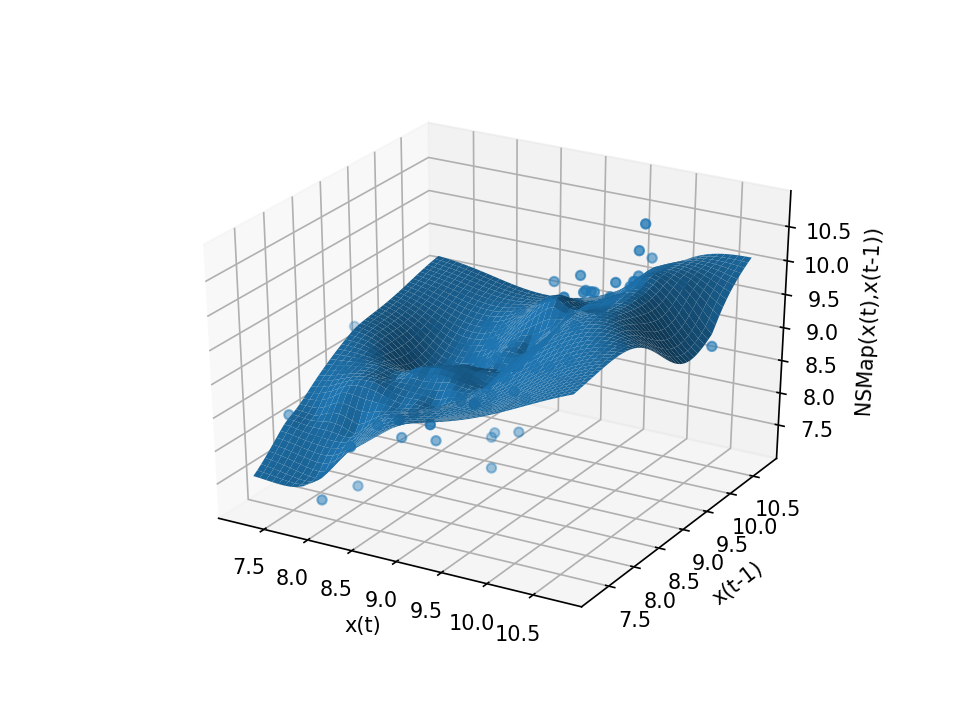

In [69]:
functionSurfaceSMap(s, 3, thetaBS, 50)

<IPython.core.display.Javascript object>


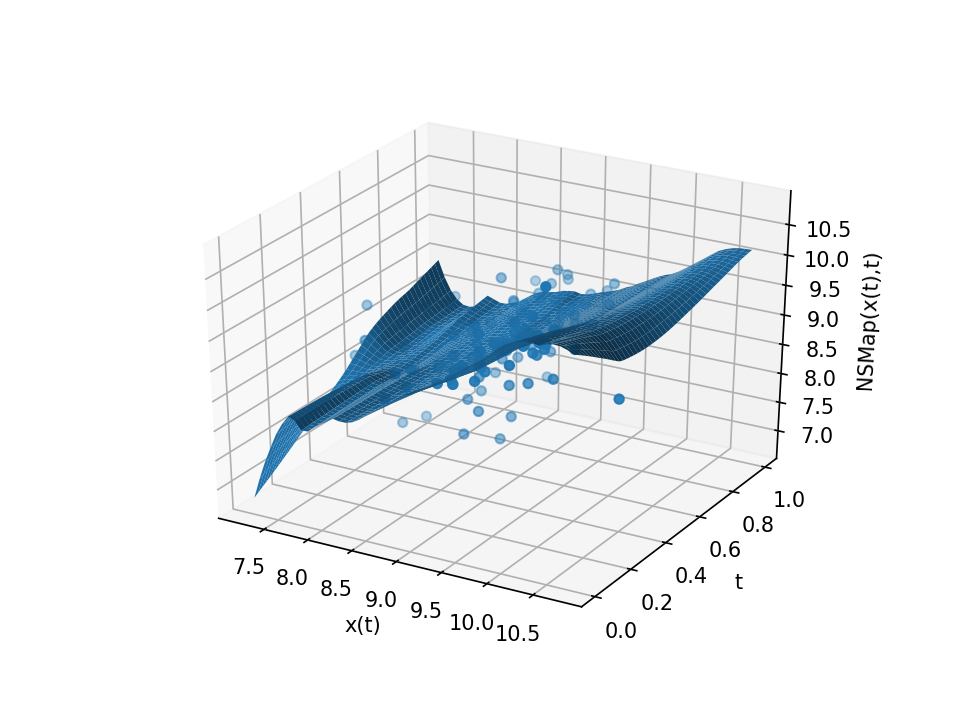

In [70]:
functionSurfaceNSMap(s,3,thetaB,deltaB,50)

In [71]:
lambdaLR, dof = likelihoodRatioTest(X, Y, tx, thetaBS, thetaB, deltaB, errMap)

Probabiliy of SMap superiority :  0.03074819406783247
LambdaLR =  9.551421408088109  dof =  3.365619669166392


In [14]:
# Plot Function Surface

# Parameters
theta = thetaBS
delta = 0
currentTime = 0

# Create Function Surface
res = 250
r = np.linspace(10, 15, num=res)
A, B = np.meshgrid(r,r)
C = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        x=np.array([A[i,j],B[i,j]])
        C[i,j] = GMap(X, Y, tx, x, currentTime, theta, delta)


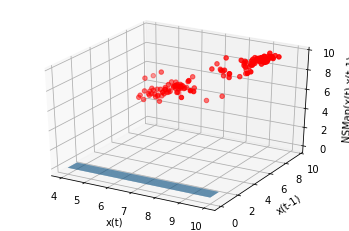

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(A, B, C)
ax.scatter(Y[2:],Y[1:-1],Y[:-2],c="red")
ax.set_xlabel("x(t)")
ax.set_ylabel("x(t-1)")
ax.set_zlabel("NSMap(x(t),x(t-1)")

plt.show()

In [16]:
# Plot Function Surface

# Parameters
theta = thetaB
delta = 0
currentTime = 0.75

# Create Function Surface
res = 500
r = np.linspace(4, 10, num=res)
T = np.linspace(0,1,num=res)
A, B = np.meshgrid(r,T)
C = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        C[i,j] = GMap(X, Y, tx, A[i,j], B[i,j], theta, delta)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(A, B, C)
ax.set_xlabel("x(t)")
ax.set_ylabel("t")
ax.set_zlabel("NSMap(x(t),t)")

plt.show()

In [ ]:
# Plot Function Graph

# Plot Function Surface

# Parameters
theta = thetaB
delta = 0
currentTime = 0.5

# Create Function Surface
res = 500
r = np.linspace(7, 11, num=res)
N = np.zeros(res)
for i in range(res):
    N[i] = GMap(X, Y, tx, r[i], currentTime, theta, delta)

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(r, N)
ax.set_xlabel("x(t)")
ax.set_ylabel("NSMap(x(t))")
plt.show()